# Exploratory Data Analysis (EDA)
## Real Estate Investment Advisor

### Objective

The objective of this Exploratory Data Analysis (EDA) is to:

- Understand the structure, scale, and quality of the housing dataset.
- Identify key features influencing property price and investment potential.
- Examine distributions and relationships of core variables such as:
  - Price, Size, BHK, Location, Furnishing, Amenities
- Detect data quality issues including:
  - Missing values
  - Duplicate records
  - Unrealistic or extreme values (outliers)

The insights from this EDA will directly support:

✔ Feature engineering decisions  
✔ Synthetic target creation (`Good_Investment`, `Future_Price_5Y`)  
✔ Downstream classification and regression modeling

⚠️ **Note**: Target variables are created later for modeling purposes and are not part of the raw dataset.


In [1]:
# ============================================
# Project Setup & Imports (STANDARDIZED)
# ============================================

import sys
from pathlib import Path

# --- Locate project root (folder containing 'src/') ---
PROJECT_ROOT = None
for parent in Path.cwd().resolve().parents:
    if (parent / "src").exists():
        PROJECT_ROOT = parent
        break

if PROJECT_ROOT is None:
    raise RuntimeError("Project root with 'src/' directory not found.")

# Add project root to Python path
sys.path.insert(0, str(PROJECT_ROOT))

# -----------------------------------------------
# Core libraries
# -----------------------------------------------
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Project imports
from src.features.build_features import validate_features
from src.data.load import load_raw_data

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
sns.set_style("whitegrid")

print(f"✅ Project root set to: {PROJECT_ROOT}")


✅ Project root set to: D:\Labmentix\2nd Project\Real_Estate_Investment_Advisor


In [2]:
# ===============================
# 3. Loading the Dataset
# ===============================

# Load raw dataset
df = load_raw_data("../data/raw/india_housing_prices.csv")

# Keep a raw copy for EDA
df_raw = df.copy()

# Dataset shape
df.shape


(250000, 23)

## 4️. Basic Data Overview

In [3]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


## 5. Data Quality Checks

We perform basic sanity checks before analysis:

- Missing values
- Duplicate rows
- Data types


In [4]:
pd.DataFrame({
    "Metric": ["Missing Values", "Duplicate Rows"],
    "Count": [df.isnull().sum().sum(), df.duplicated().sum()]
})

,Metric,Count
0,Missing Values,0
1,Duplicate Rows,0


In [5]:
df.dtypes

ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No                            int64
Total_Floors                        int64
Age_of_Property                     int64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility     object
Parking_Space                      object
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status                object
dtype: object

## 📌 Data Quality Summary

- Dataset contains **250,000 rows** and **23 columns**.
- **Missing Values:**
  - ✔ There are **0 missing values** in all columns (0% missing rate).
  - ➤ No imputation required for this dataset.
- **Duplicate Rows:**
  - ✔ Duplicate rows found: **0**
  - ➤ Dataset appears already deduplicated.
- **Data Types:**
  - ✔ Numeric features such as `Price_in_Lakhs`, `Size_in_SqFt`, `BHK`, etc. are correctly represented as `int64/float64`.
  - ✔ Categorical features such as `City`, `Locality`, `Property_Type`, etc. are correctly represented as `object`.
- **Conclusion:**
  - Overall data quality is **excellent**.
  - No major data cleaning is required.
  - We can move directly to **exploratory visual analysis** and **feature engineering**.


## Core Feature Distributions

The following plots focus on features most relevant to pricing and investment decisions.


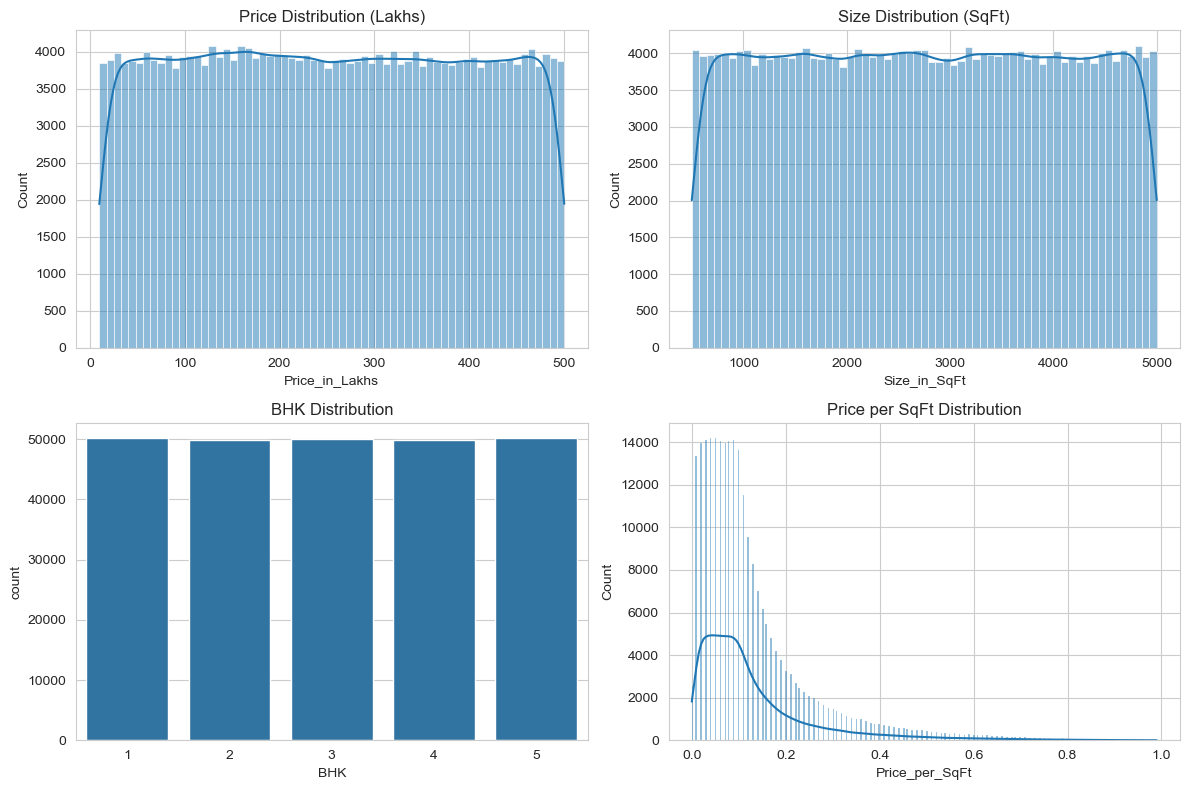

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df["Price_in_Lakhs"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Price Distribution (Lakhs)")

sns.histplot(df["Size_in_SqFt"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Size Distribution (SqFt)")

sns.countplot(x=df["BHK"], ax=axes[1, 0])
axes[1, 0].set_title("BHK Distribution")

sns.histplot(df["Price_per_SqFt"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Price per SqFt Distribution")

plt.tight_layout()
plt.show()


## 6. Univariate Analysis – Numerical Features: Observations

- **Price (`Price_in_Lakhs`)**
  - Prices are spread almost uniformly between ~0 and ~500 Lakhs.
  - Such uniformity is uncommon in real housing markets, where prices are usually right-skewed.

- **Size (`Size_in_SqFt`)**
  - Property sizes show a near-uniform distribution between ~500 and ~5000 SqFt.
  - In real datasets, mid-sized homes typically dominate, suggesting this dataset is well-balanced.

- **BHK (Bedrooms)**
  - Listings across 1 to 5 BHK are almost evenly distributed.
  - Real-world data usually has higher concentration in 2–3 BHK properties.

- **Price per SqFt**
  - Displays a right-skewed distribution.
  - Most properties cluster at lower price-per-SqFt values, while a small subset commands premium pricing.

### Conclusion
- Numerical features appear **artificially balanced**, which is beneficial for model training.
- However, the distributions may not fully reflect real-world market behavior.
- This should be considered when interpreting model outputs.


## 7. Univariate Analysis – Categorical Features

We analyze the distribution of important categorical variables to understand
the diversity and representation of different property attributes.


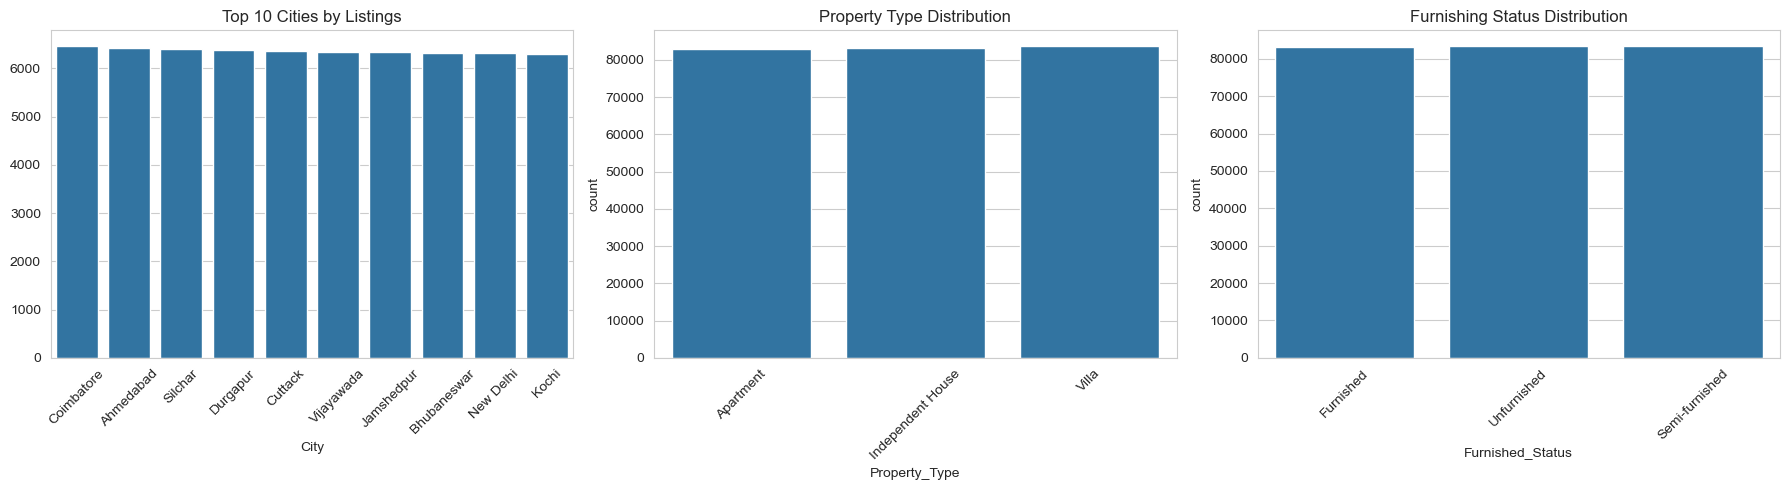

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Top 10 Cities by number of listings
top_cities = df["City"].value_counts().head(10)
sns.barplot(
    x=top_cities.index,
    y=top_cities.values,
    ax=axes[0]
)
axes[0].set_title("Top 10 Cities by Listings")
axes[0].tick_params(axis="x", rotation=45)

# Property Type distribution
sns.countplot(
    x=df["Property_Type"],
    ax=axes[1]
)
axes[1].set_title("Property Type Distribution")
axes[1].tick_params(axis="x", rotation=45)

# Furnishing Status distribution
sns.countplot(
    x=df["Furnished_Status"],
    ax=axes[2]
)
axes[2].set_title("Furnishing Status Distribution")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()



## 7. Univariate Analysis – Categorical Features: Observations

- **City**
  - The top-listed cities show very similar listing counts.
  - This indicates a balanced representation across major locations.

- **Property Type**
  - `Apartment`, `Independent House`, and `Villa` appear in nearly equal proportions.
  - No single property type dominates the dataset.

- **Furnished Status**
  - `Unfurnished`, `Semi-furnished`, and `Furnished` properties are evenly distributed.
  - This balance helps prevent bias toward any furnishing category during model training.

### Final Observation
- The categorical features analyzed are **well balanced**, with no major class imbalance.
- Such balance is favorable for machine learning models.
- However, real-world housing markets often exhibit skew toward certain cities or property types, which should be considered when interpreting results.


## 8. Bivariate Analysis – Price Relationships

In this section, we analyze how property price (measured using
`Price_per_SqFt`) varies across different cities. This helps identify
location-level pricing patterns and highlights the importance of location
as a key factor in property valuation.


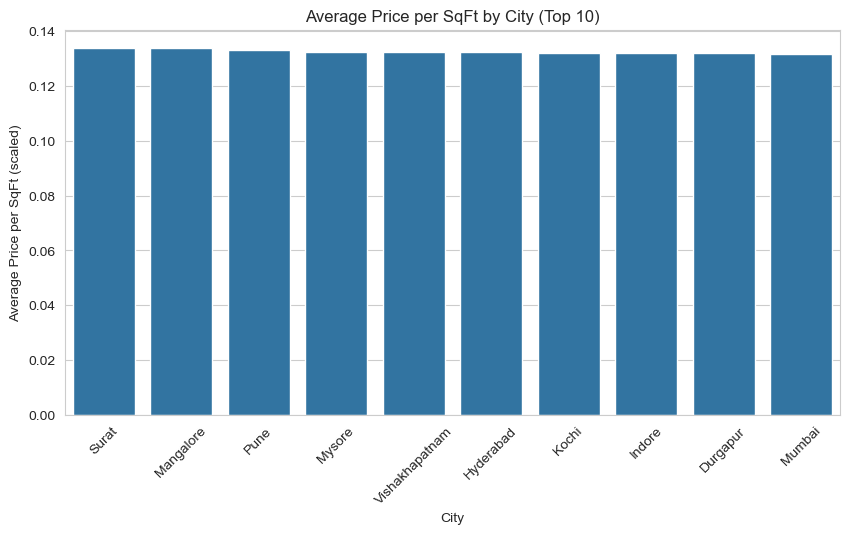

In [8]:
city_price = (
    df.groupby("City")["Price_per_SqFt"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=city_price.index, y=city_price.values)
plt.xticks(rotation=45)
plt.ylabel("Average Price per SqFt (scaled)")
plt.title("Average Price per SqFt by City (Top 10)")
plt.show()


### 8. Bivariate Analysis – Price Relationships: Observations

- Average `Price_per_SqFt` varies across cities, even though the overall range
  is relatively narrow due to dataset balancing.
- Cities such as **Surat, Mangalore, and Pune** rank higher in terms of
  average price per SqFt.
- This indicates that **location has a measurable impact on property pricing**.
- City-level features are therefore expected to be **strong predictors**
  in downstream machine learning models.


## Correlation Analysis

We analyze linear correlations between numerical features and
`Price_in_Lakhs` to identify which variables have the strongest
direct relationship with property price.


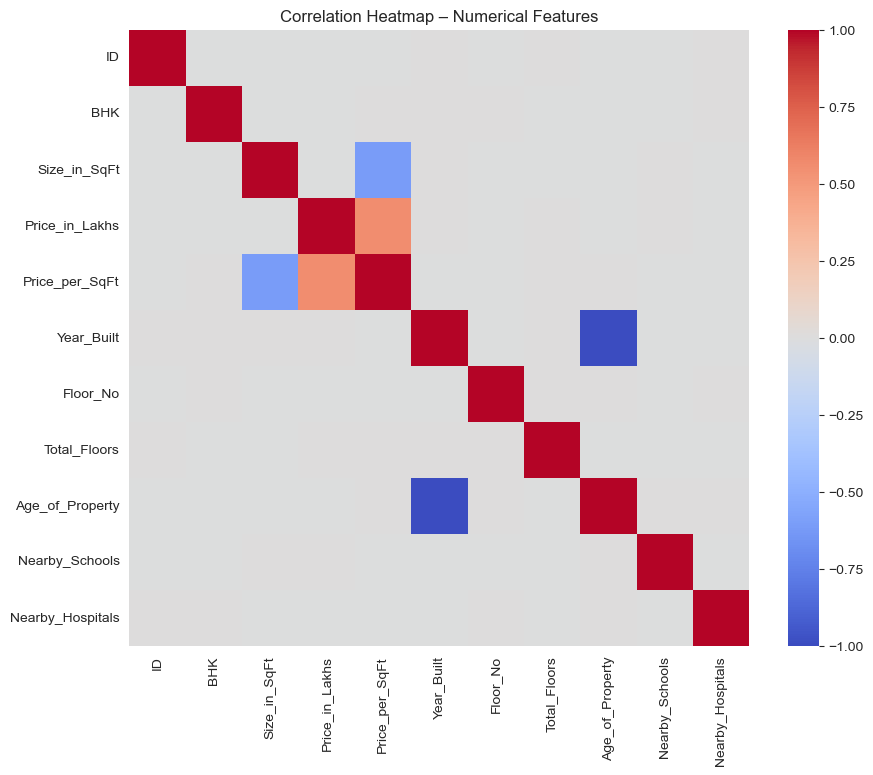

Price_in_Lakhs      1.00
Price_per_SqFt      0.56
Year_Built          0.00
Total_Floors        0.00
Nearby_Schools      0.00
BHK                -0.00
ID                 -0.00
Floor_No           -0.00
Size_in_SqFt       -0.00
Age_of_Property    -0.00
Nearby_Hospitals   -0.00
Name: Price_in_Lakhs, dtype: float64

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – Numerical Features")
plt.show()

# Correlation ranking with Price
corr_with_price = corr["Price_in_Lakhs"].sort_values(ascending=False)
corr_with_price


### Correlation Insights – Observations

- **Strongest correlation with `Price_in_Lakhs`:**
  - `Price_per_SqFt` → **moderate positive correlation (~0.56)**

- **Weak or near-zero correlations:**
  - `Size_in_SqFt`, `BHK`
  - `Total_Floors`, `Year_Built`, `Floor_No`
  - `Nearby_Schools`, `Nearby_Hospitals`, `Age_of_Property`

- **Interpretation:**
  - `Price_per_SqFt` shows the strongest linear relationship with overall price.
  - Other numerical features exhibit weak linear correlations, likely due to
    the balanced and synthetic nature of the dataset.
  - Weak linear correlation does not imply irrelevance; these features may still
    contribute through non-linear interactions in tree-based models.

### Conclusion
- Property price is most strongly associated with `Price_per_SqFt`.
- Additional features will be retained for modeling to capture
  non-linear effects and interaction patterns.



## Outlier Analysis – Observations

Boxplots reveal the presence of extreme high-end properties in:

- **Price_in_Lakhs** (values approaching ~500 Lakhs)
- **Size_in_SqFt** (values extending up to ~5000 SqFt)

The top **1% most expensive properties (~2,500 rows)** represent luxury listings.

### Impact on Modeling
- Extreme values can disproportionately influence regression models.
- They may reduce model performance for mid-range properties.

### Handling Strategy
- Instead of removing these observations, values above the **99th percentile**
  will be **capped during preprocessing**.
- This preserves valuable market information while limiting distortion
  during model training.


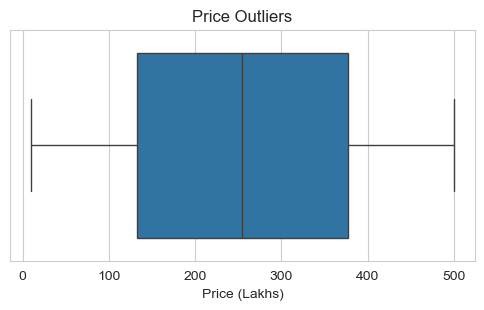

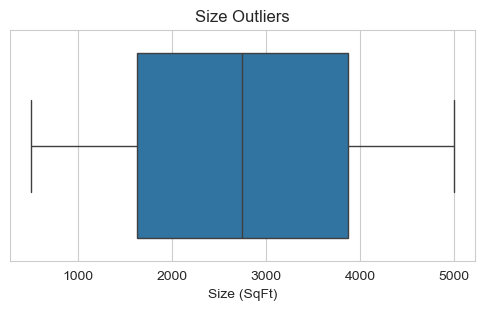

Top 1% expensive properties: 2500


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
109,110,Rajasthan,Jaipur,Locality_422,Apartment,4,2636,498.63,0.19,2001,Unfurnished,24,10,24,8,8,High,No,Yes,"Clubhouse, Pool",East,Builder,Ready_to_Move
180,181,Chhattisgarh,Bilaspur,Locality_382,Apartment,4,741,499.57,0.67,1992,Semi-furnished,2,15,33,5,6,Medium,Yes,No,"Garden, Pool, Clubhouse, Gym",North,Broker,Under_Construction
183,184,Andhra Pradesh,Vijayawada,Locality_391,Independent House,3,600,498.79,0.83,2016,Semi-furnished,25,15,9,3,7,High,Yes,No,"Clubhouse, Playground, Gym",South,Owner,Under_Construction
203,204,Delhi,Dwarka,Locality_450,Independent House,1,3172,496.37,0.16,2023,Semi-furnished,23,16,2,10,6,High,Yes,No,Garden,West,Builder,Ready_to_Move
372,373,Bihar,Patna,Locality_174,Independent House,5,2283,497.60,0.22,2021,Semi-furnished,18,3,4,5,4,High,Yes,Yes,"Playground, Gym, Pool",South,Broker,Under_Construction


In [10]:
# Boxplot for Price
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["Price_in_Lakhs"])
plt.title("Price Outliers")
plt.xlabel("Price (Lakhs)")
plt.show()

# Boxplot for Size
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["Size_in_SqFt"])
plt.title("Size Outliers")
plt.xlabel("Size (SqFt)")
plt.show()

# Identify top 1% expensive properties
price_cutoff = df["Price_in_Lakhs"].quantile(0.99)
high_price_properties = df[df["Price_in_Lakhs"] > price_cutoff]

print("Top 1% expensive properties:", len(high_price_properties))
high_price_properties.head()



## Outlier Handling Strategy (For Modeling)

Instead of removing outliers, we will:

- Cap extreme values above the **99th percentile**
  for numerical features such as:
  - `Price_in_Lakhs`
  - `Size_in_SqFt`

### Rationale
- Preserves valuable market signals from premium properties
- Prevents extreme values from dominating model training
- Improves robustness across both regular and luxury listings

➡️ Outlier handling will be applied **only during preprocessing**  
and **not during EDA**, to maintain transparency of the raw data.


## EDA Summary & Key Insights

### 🔹 Data Quality
- Dataset contains **250,000 rows** and **23 features**
- ✓ No missing values
- ✓ No duplicate records
- Overall data quality is excellent and ready for modeling

### 🔹 Market Overview
- Most property prices fall between **100–400 Lakhs**
- Typical property sizes range from **2000–4000 SqFt**
- Most common configurations are **3 BHK and 4 BHK**

### 🔹 Location Insights
- Cities with higher average price per SqFt include
  **Surat, Mangalore, and Pune**
- Cities such as **Coimbatore** and **Ahmedabad** show high listing activity
- Location shows a **significant influence** on property valuation

### 🔹 Correlation Findings
- `Price_per_SqFt` shows the strongest **linear relationship** with price
- Other numerical features exhibit weak linear correlation, indicating:
  - Potential non-linear interactions
  - Suitability for tree-based models

### 🔹 Outliers
- Top **1% luxury properties** were identified
- These will be capped at the **99th percentile** during preprocessing

### 🔥 Final Takeaways for Modeling
- `Price_per_SqFt` is a strong pricing signal
- Size and BHK remain useful for capturing non-linear effects
- City-level feature engineering is expected to significantly
  improve model performance

➡️ **Next step:** Feature Engineering (`02_feature_engineering.ipynb`)
